In [57]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import logging

In [62]:
logging.basicConfig(filename='logfile.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [60]:
logging.info("Reading train.csv and store.csv files...")

In [3]:
# Load the CSV file
dfStore = pd.read_csv('../data/store.csv')
test_df = pd.read_csv('../data/test.csv')


In [4]:
train_df=pd.read_csv('../data/train.csv')

C:\Users\huawei\AppData\Local\Temp\ipykernel_3276\3163751236.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df=pd.read_csv('../data/train.csv')


In [5]:
# Get the number of rows and columns
num_rows = dfStore.shape[0]
num_cols = dfStore.shape[1]

# Print the number of rows and columns
print("Store Data")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)

Store Data
Number of Rows: 1115
Number of Columns: 10


In [6]:
# Get the number of rows and columns
num_rows = test_df.shape[0]
num_cols = test_df.shape[1]

# Print the number of rows and columns
print("Test Data")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)

Test Data
Number of Rows: 41088
Number of Columns: 8


In [7]:
# Get the number of rows and columns
num_rows = train_df.shape[0]
num_cols = train_df.shape[1]

# Print the number of rows and columns
print("Train Data")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)

Train Data
Number of Rows: 1017209
Number of Columns: 9


StoreCSv

In [ ]:
logging.info("Data Cleaning")

In [8]:
# Remove rows with NaN values
dfStore = dfStore.dropna()

# Create a pipeline for numeric columns
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# Create a pipeline for non-numeric columns
non_numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

In [9]:
# Identify numeric and non-numeric columns
numeric_cols = dfStore.select_dtypes(include='number').columns
non_numeric_cols = dfStore.select_dtypes(exclude='number').columns

# Apply pipelines to numeric columns
dfStore[numeric_cols] = numeric_pipeline.fit_transform(dfStore[numeric_cols])

# Apply pipelines to non-numeric columns
dfStore[non_numeric_cols] = non_numeric_pipeline.fit_transform(dfStore[non_numeric_cols])

In [10]:
num_rows = dfStore.shape[0]
num_cols = dfStore.shape[1]
print("Store Data")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)

Store Data
Number of Rows: 365
Number of Columns: 10


TestCSV

In [11]:
# Custom transformer to filter rows based on Store column
class FilterStore(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[X['Store'].isin(dfStore['Store'])]

# Custom transformer to filter rows based on Open column
class FilterOpen(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[X['Open'].isin([0, 1])]

# Custom transformer to filter rows based on StateHoliday column
class FilterStateHoliday(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[X['StateHoliday'].isin(['a', 'b', 'c', 0])]

# Custom transformer to remove rows with NaN values
class RemoveNaN(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.dropna()

In [12]:
# Create a pipeline to perform the tasks
pipeline = Pipeline([
    ('filter_store', FilterStore()),
    ('filter_open', FilterOpen()),
    ('filter_state_holiday', FilterStateHoliday()),
    ('remove_nan', RemoveNaN())
])

In [13]:
# Apply the pipeline to the test_data
filtered_data = pipeline.fit_transform(test_df)

Train

In [14]:
# Apply the pipeline to the Train Data
filtered_data = pipeline.fit_transform(train_df)

In [15]:
num_rows = train_df.shape[0]
num_cols = train_df.shape[1]
print("Store Data")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)

Store Data
Number of Rows: 1017209
Number of Columns: 9


●	Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

they are slightly different 

In the training set, approximately 38.2% of the records have a promotion (Promo=1), while around 61.8% do not have a promotion (Promo=0).

In the test set, approximately 39.6% of the records have a promotion (Promo=1), while around 60.4% do not have a promotion (Promo=0).

Although the distributions are not exactly the same, they are relatively similar, with both sets having a higher proportion of records without promotions (Promo=0).

In [16]:
# Check distribution of promotions in the training set
train_promo_distribution = train_df['Promo'].value_counts(normalize=True)
print("Training set promotion distribution:")
print(train_promo_distribution)



Training set promotion distribution:
Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64


In [17]:
# Check distribution of promotions in the test set
test_promo_distribution = test_df['Promo'].value_counts(normalize=True)
print("\nTest set promotion distribution:")
print(test_promo_distribution)


Test set promotion distribution:
Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


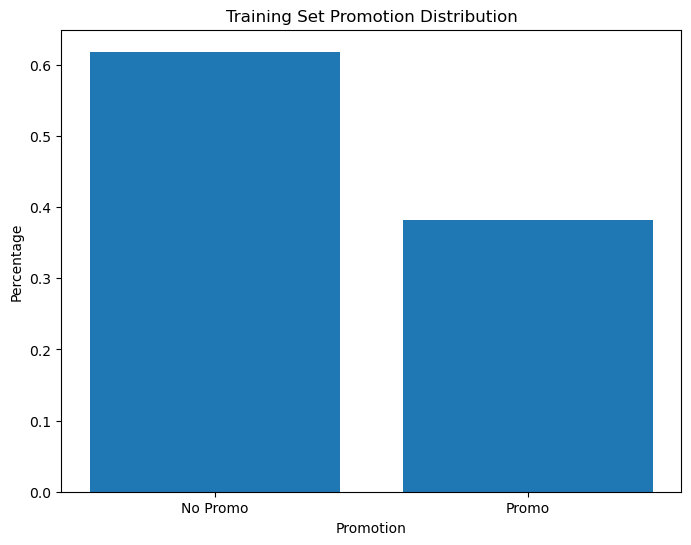

In [18]:
# Plotting the distribution of promotions in the training set
plt.figure(figsize=(8, 6))
plt.bar(train_promo_distribution.index, train_promo_distribution.values)
plt.title("Training Set Promotion Distribution")
plt.xlabel("Promotion")
plt.ylabel("Percentage")
plt.xticks(train_promo_distribution.index, ['No Promo', 'Promo'])
plt.show()

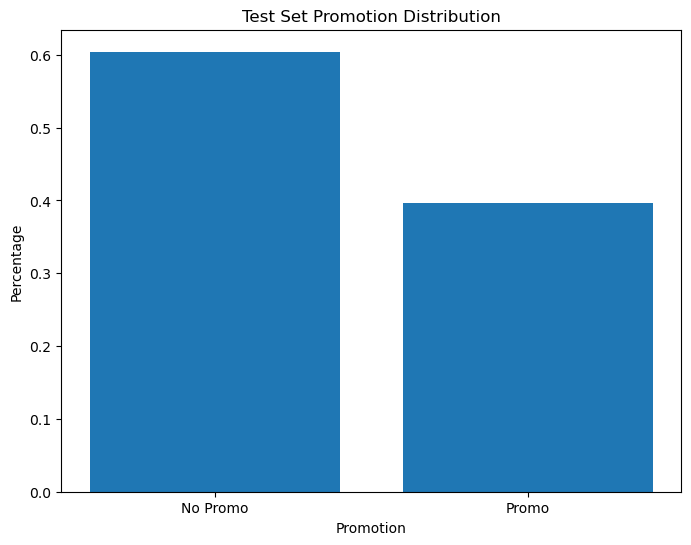

In [19]:
# Plotting the distribution of promotions in the test set
plt.figure(figsize=(8, 6))
plt.bar(test_promo_distribution.index, test_promo_distribution.values)
plt.title("Test Set Promotion Distribution")
plt.xlabel("Promotion")
plt.ylabel("Percentage")
plt.xticks(test_promo_distribution.index, ['No Promo', 'Promo'])
plt.show()

Check & compare sales behavior before, during, and after holidays

Using Train CSV

In [20]:
# Convert the 'Date' column to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [21]:
# Create a new column 'HolidayPeriod'
train_df['HolidayPeriod'] = 'Non-Holiday'

In [22]:
# Identify the sales behavior before, during, and after holidays
train_df.loc[train_df['StateHoliday'] != '0', 'HolidayPeriod'] = 'During Holiday'
train_df.loc[(train_df['StateHoliday'] == '0') & (train_df['StateHoliday'].shift(1) != '0'), 'HolidayPeriod'] = 'Before Holiday'
train_df.loc[(train_df['StateHoliday'] == '0') & (train_df['StateHoliday'].shift(-1) != '0'), 'HolidayPeriod'] = 'After Holiday'


In [23]:
# Calculate the average sales for each holiday period
average_sales_by_period = train_df.groupby('HolidayPeriod')['Sales'].mean()


In [24]:
# Print the average sales for each holiday period
print(average_sales_by_period)

HolidayPeriod
After Holiday     6970.543073
Before Holiday    6918.088683
During Holiday    4684.874237
Non-Holiday       5975.683664
Name: Sales, dtype: float64


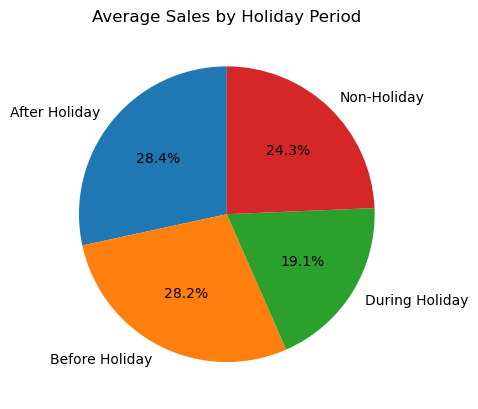

In [25]:
# Data for the pie chart
labels = average_sales_by_period.index
sizes = average_sales_by_period.values

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Adding a title
plt.title("Average Sales by Holiday Period")

# Display the chart
plt.show()

●	Find out any seasonal (Christmas, Easter, etc) purchase behaviors,

In [26]:
# Filter data for Christmas and Easter holidays
christmas_sales = train_df[train_df['StateHoliday'] == 'c']['Sales']
easter_sales = train_df[train_df['StateHoliday'] == 'b']['Sales']

In [27]:
# Calculate the average sales during Christmas and Easter
avg_christmas_sales = christmas_sales.mean()
avg_easter_sales = easter_sales.mean()


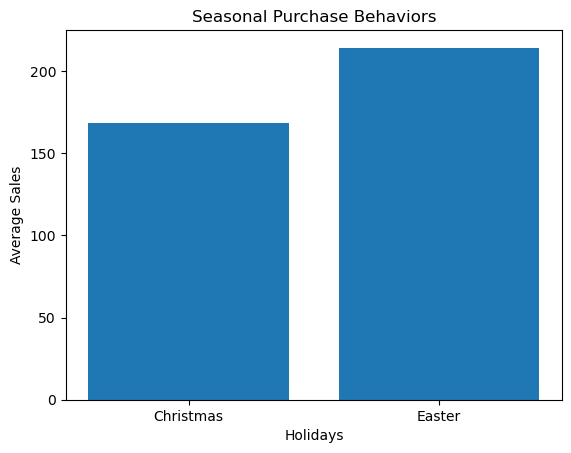

In [28]:
# Create a bar chart
holiday_labels = ['Christmas', 'Easter']
sales_data = [avg_christmas_sales, avg_easter_sales]

plt.bar(holiday_labels, sales_data)
plt.xlabel('Holidays')
plt.ylabel('Average Sales')
plt.title('Seasonal Purchase Behaviors')

# Show the plot
plt.show()

●	What can you say about the correlation between sales and the number of customers?
Based on the correlation value of 0.895, we can say that there is a strong positive correlation between sales and the number of customers. This means that as the number of customers increases, the sales also tend to increase. The correlation value of 0.895 suggests a strong linear relationship between these variables.

In [29]:
# Calculate the correlation between Sales and Customers
correlation = train_df['Sales'].corr(train_df['Customers'])

# Print the correlation value
print("Correlation between Sales and Customers:", correlation)

Correlation between Sales and Customers: 0.894710773301837


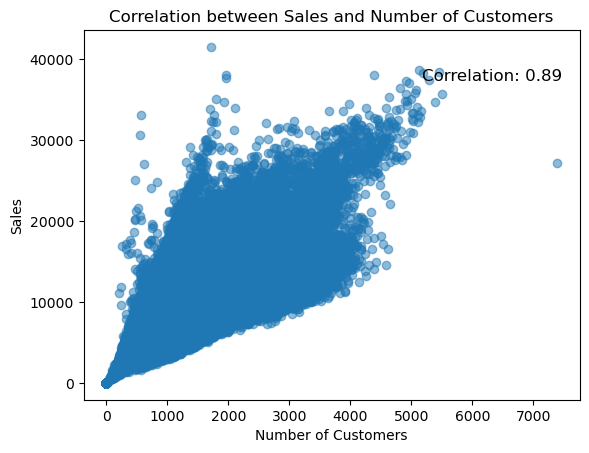

In [30]:
# Create a scatter plot
plt.scatter(train_df['Customers'], train_df['Sales'], alpha=0.5)
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.title('Correlation between Sales and Number of Customers')

# Add correlation value to the plot
plt.text(train_df['Customers'].max() * 0.7, train_df['Sales'].max() * 0.9,
         f'Correlation: {correlation:.2f}', fontsize=12)

# Show the plot
plt.show()

How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

the average sales during promotional days (avg_sales_promo) are approximately 7991.15, while the average sales on non-promotional days (avg_sales_non_promo) are around 517.82. This suggests that promotions have a positive impact on sales, as the average sales during promos are significantly higher than on non-promo days.

In terms of attracting more customers, the average number of customers during promotional days (avg_customers_promo) is approximately 820.10, while the average number of customers on non-promotional days (avg_customers_non_promo) is approximately 517.82. This indicates that promotions do attract more customers, as the average number of customers during promos is higher than on non-promo days.

Therefore, based on the provided data, we can conclude  that promotions positively impact sales by attracting more customers. 

In [31]:
# Filter data for days with and without promotions
promo_days = train_df[train_df['Promo'] == 1]
non_promo_days = train_df[train_df['Promo'] == 0]

In [32]:
# Calculate the average sales and customers for promo and non-promo days
avg_sales_promo = promo_days['Sales'].mean()
avg_sales_non_promo = non_promo_days['Sales'].mean()

avg_customers_promo = promo_days['Customers'].mean()
avg_customers_non_promo = non_promo_days['Customers'].mean()

print("Average sales Promo :-",avg_sales_promo)
print("Average sales Non-Promo :-",avg_customers_non_promo)
print("Average Customers-Promo :-",avg_customers_promo)
print("Average Customers-Promo :-",avg_customers_non_promo)

Average sales Promo :- 7991.152045969903
Average sales Non-Promo :- 517.8235417537579
Average Customers-Promo :- 820.0988146773861
Average Customers-Promo :- 517.8235417537579


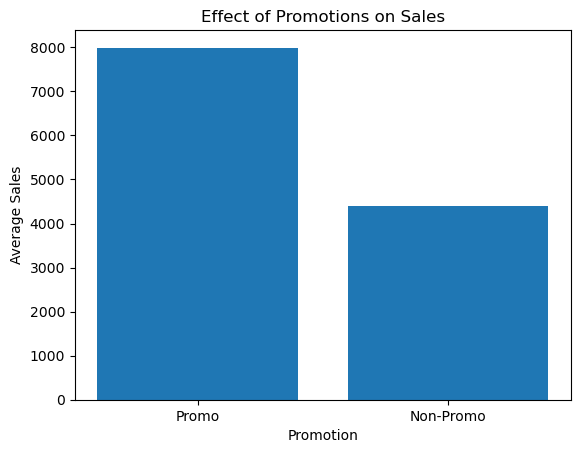

In [33]:
# Create a bar chart for average sales
sales_labels = ['Promo', 'Non-Promo']
sales_data = [avg_sales_promo, avg_sales_non_promo]

plt.bar(sales_labels, sales_data)
plt.xlabel('Promotion')
plt.ylabel('Average Sales')
plt.title('Effect of Promotions on Sales')

# Show the plot for average sales
plt.show()

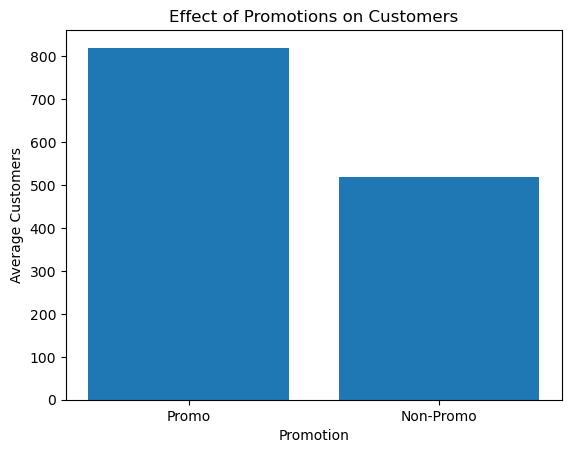

In [34]:
# Create a bar chart for average customers
customers_labels = ['Promo', 'Non-Promo']
customers_data = [avg_customers_promo, avg_customers_non_promo]

plt.bar(customers_labels, customers_data)
plt.xlabel('Promotion')
plt.ylabel('Average Customers')
plt.title('Effect of Promotions on Customers')

# Show the plot for average customers
plt.show()

●	Could the promos be deployed in more effective ways? Which stores should promos be deployed in?
Based on the average sales by store type, it appears that Store Types "d", "a", and "c" have higher average sales compared to other store types. Therefore, deploying promotions in these store types could be more effective in boosting sales.

In [61]:
logging.info("Merging train_data and store_data...")
# Merge the train_data and store_data based on the "Store" column
merged_data = pd.merge(train_df, dfStore, on="Store")

In [36]:
# Filter out the required columns
filtered_data = merged_data[["Store", "Sales", "Customers", "Open", "StateHoliday", "SchoolHoliday", "StoreType", "Promo"]]


In [37]:

# Group the data by StoreType and calculate the average sales for each StoreType
average_sales_by_storetype = filtered_data.groupby("StoreType")["Sales"].mean()

In [38]:

# Sort the stores based on average sales in descending order to find the most effective store types for promos
effective_storetypes = average_sales_by_storetype.sort_values(ascending=False)

In [39]:
# Print the effective store types for promos
print("Effective Store Types for Promos:")
print(effective_storetypes)

Effective Store Types for Promos:
StoreType
d    5470.696221
a    5409.669595
c    5179.656906
Name: Sales, dtype: float64


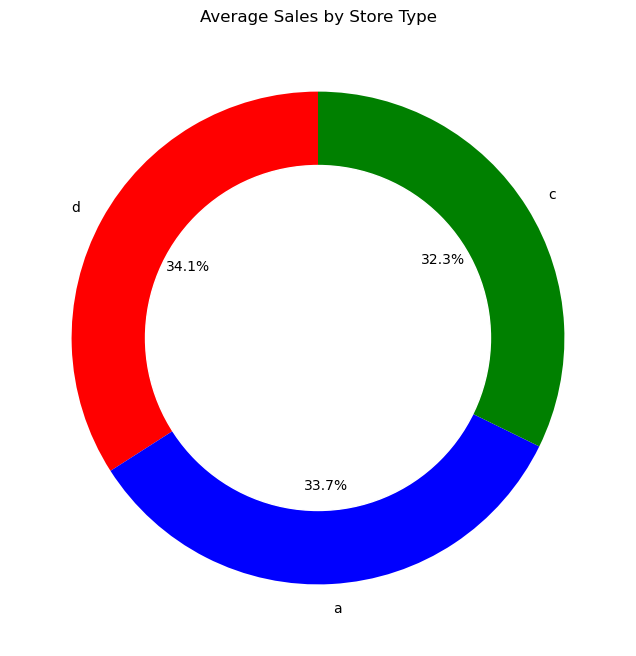

In [40]:
# Define the desired colors
colors = ["red", "blue", "green"]

# Create a donut chart to visualize the average sales by store type
plt.figure(figsize=(8, 8))
plt.pie(effective_storetypes, labels=effective_storetypes.index, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a circle at the center to create a donut shape
circle = plt.Circle((0,0), 0.7, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

# Add a title
plt.title("Average Sales by Store Type")

# Display the chart
plt.show()

●	Trends of customer behavior during store opening and closing times

In [41]:
# Convert the "Date" column to datetime format
train_df["Date"] = pd.to_datetime(train_df["Date"])


In [42]:

# Extract the day of the week from the "Date" column
train_df["DayOfWeek"] = train_df["Date"].dt.dayofweek


In [43]:
# Filter the data for open stores
open_stores = train_df[train_df["Open"] == 1]

In [44]:

# Group the data by the day of the week and calculate the average number of customers during opening hours
avg_customers_open = open_stores.groupby("DayOfWeek")["Customers"].mean()
print(avg_customers_open)

DayOfWeek
0     855.444984
1     769.986753
2     740.598876
3     755.569784
4     781.771639
5     660.177526
6    1441.532424
Name: Customers, dtype: float64


In [45]:
# Filter the data for closed stores
closed_stores = train_df[train_df["Open"] == 0]

In [46]:

# Group the data by the day of the week and calculate the average number of customers during closing hours
avg_customers_closed = closed_stores.groupby("DayOfWeek")["Customers"].mean()

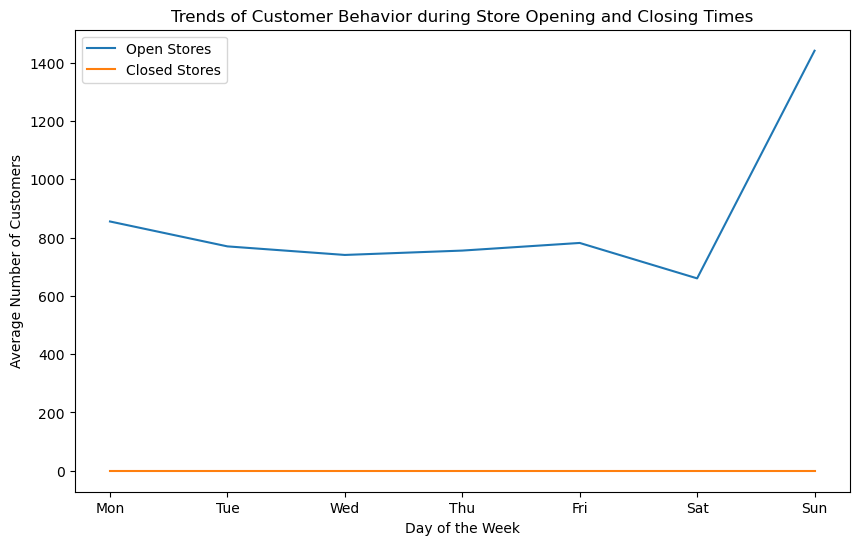

In [47]:
# Create a line plot to visualize the trends of customer behavior during store opening and closing times
plt.figure(figsize=(10, 6))
plt.plot(avg_customers_open, label="Open Stores")
plt.plot(avg_customers_closed, label="Closed Stores")
plt.xlabel("Day of the Week")
plt.ylabel("Average Number of Customers")
plt.title("Trends of Customer Behavior during Store Opening and Closing Times")
plt.legend()
plt.xticks(range(7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

# Display the plot
plt.show()

●	Which stores are open on all weekdays? How does that affect their sales on weekends? 

In [48]:
# Convert the "Date" column to datetime format
train_df["Date"] = pd.to_datetime(train_df["Date"])
# Extract the day of the week from the "Date" column
train_df["DayOfWeek"] = train_df["Date"].dt.dayofweek
logging.info("Filtering stores with competitor distance before and after reopening...")
# Filter the data for open stores
open_stores = train_df[train_df["Open"] == 1]

# Group the data by store and calculate the count of unique weekdays
weekday_counts = open_stores.groupby("Store")["DayOfWeek"].nunique()

# Filter stores that are open on all weekdays
stores_open_all_weekdays = weekday_counts[weekday_counts == 5].index

# Filter the data for the stores that are open on all weekdays
open_all_weekdays_data = open_stores[open_stores["Store"].isin(stores_open_all_weekdays)]

# Group the data by store and calculate the average sales on weekends (Saturday and Sunday)
avg_sales_weekends = open_all_weekdays_data[open_all_weekdays_data["DayOfWeek"].isin([5, 6])].groupby("Store")["Sales"].mean()

# Print the stores that are open on all weekdays
print("Stores Open on All Weekdays:")
print(stores_open_all_weekdays)



Stores Open on All Weekdays:
Index([], dtype='int64', name='Store')


In [49]:
# Print the average sales on weekends for these stores
print("\nAverage Sales on Weekends for Stores Open on All Weekdays:")
print(avg_sales_weekends)


Average Sales on Weekends for Stores Open on All Weekdays:
Series([], Name: Sales, dtype: float64)


●	Check how the assortment type affects sales

we can see that the assortment type 'a' has a total sales value of 971,834,451, while the assortment type 'c' has a total sales value of 779,193,689. From this information, we can conclude that assortment type 'a' has higher sales compared to assortment type 'c'.

This indicates that the assortment type does affect sales, with assortment type 'a' having a higher impact on sales compared to assortment type 'c'.

In [50]:
# Merge the two CSV files on the 'Store' column
merged_df = pd.merge(train_df, dfStore, on='Store')

# Check how the assortment type affects sales
assortment_sales = merged_df.groupby('Assortment')['Sales'].sum()

# Print the sales for each assortment type
print(assortment_sales)

Assortment
a    971834451
c    779193689
Name: Sales, dtype: int64


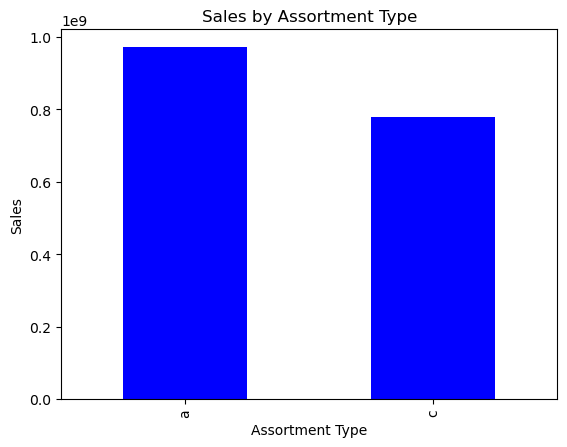

In [51]:
# Create a bar plot to visualize the sales for each assortment type
assortment_sales.plot(kind='bar', color='blue')

# Set the plot title and labels
plt.title("Sales by Assortment Type")
plt.xlabel("Assortment Type")
plt.ylabel("Sales")

# Display the plot
plt.show()

●	How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centers, does the distance matter in that case?
Based on the correlation value of -0.084, there seems to be a weak negative correlation between the distance to the next competitor and sales in city centers. This suggests that as the distance to the next competitor increases, sales may slightly decrease, although the relationship is not very strong.

However, it's important to note that correlation does not imply causation. Other factors may also influence sales in city centers, and the distance to the next competitor alone may not be the sole determinant. It is necessary to consider additional variables and conduct further analysis to better understand the relationship.

In [52]:
# Merge the two dataframes based on Store ID
merged_data = pd.merge(train_df, dfStore, on="Store")

# Filter the data for stores in city centers
city_center_stores = merged_data[merged_data['StoreType'] == 'c']

# Calculate the correlation between distance to the next competitor and sales
correlation = city_center_stores['CompetitionDistance'].corr(city_center_stores['Sales'])

# Print the correlation value
print("Correlation between distance to the next competitor and sales in city centers:", correlation)

Correlation between distance to the next competitor and sales in city centers: -0.08409216492177721


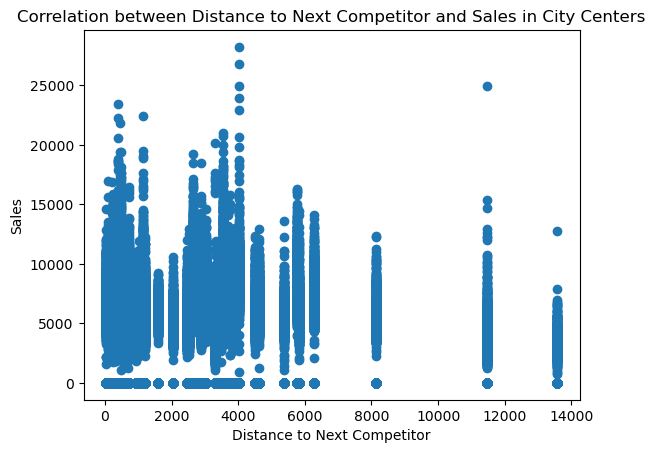

In [53]:

# Create a scatter plot
plt.scatter(city_center_stores['CompetitionDistance'], city_center_stores['Sales'])
plt.xlabel('Distance to Next Competitor')
plt.ylabel('Sales')
plt.title('Correlation between Distance to Next Competitor and Sales in City Centers')
plt.show()